# **Logistic Regression**
**Logistic Regression is a Machine Learning algorithm used for classification problems. It helps in predicting whether something belongs to one category or another**

**like:**
* Spam or Not Spam (Email Classification)
* Disease or No Disease (Medical Diagnosis)
* Customer Will Buy or Not (Marketing Prediction)

<hr>

**Note** - It works by applying a Sigmoid Function (S-shaped curve) to the data, which converts predictions into probabilities between 0 and 1.



# What is Sigmoid function

The sigmoid function is a mathematical function that converts any input value into a probability between 0 and 1. It is used in Logistic Regression to make predictions.

The formula for the sigmoid function is:

<hr>

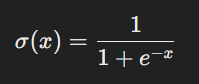

Where:
* e is Euler's number (~2.718)
* x is the input value

For example:

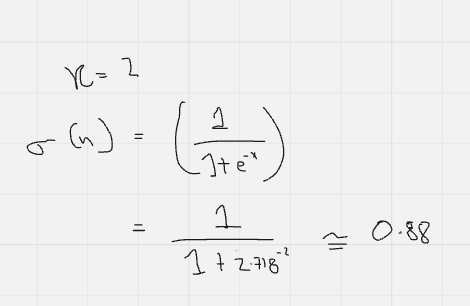

In [ ]:
# Let's do it python way
x=2
sig = 1/(1+(2.718**-x))
print(f'Sigmoid value is: {sig} so it is close to 1')
print('=====================')
print('Classified as probabilitic value 1')

Sigmoid value is: 0.8807753038918279 so it is close to 1
Classified as probabilitic value 1


In [ ]:
import numpy as np
1/(1+np.exp(-x)) #-------> Another way(np.exp() for exponential)

np.float64(0.8807970779778823)

Here, The threshold value will be 0.5---- Why?
* Because probabilitic values are between 0-1 (50-50)% chances

<hr>

###**Adjusting the Threshold Based on the Situation**
* Increase the Threshold (> 0.5) when False Positives are Bad

* Example: Medical Tests

 - If a test wrongly says a healthy person has a disease (false positive), it can cause unnecessary stress and treatments.

 - So, we set a higher threshold (e.g., 0.7) to be more sure before saying someone has the disease.

* Decrease the Threshold (< 0.5) when False Negatives are Bad

* Example: Spam Detection

 - If an actual spam email is not caught and lands in your inbox (false negative), it can be annoying or even risky.

 - To catch more spam, we lower the threshold to 0.3, even if it means a few normal emails might be wrongly marked as spam.

In [ ]:
import numpy as np

def sigmoid(x): # I have created a function of same as we implemented above
    return 1 / (1 + np.exp(-x))

def classify(x, threshold=0.5): # To adjust threshold we created this function
    if sigmoid(x) >= threshold:
      return 1
    else:
      return 0

# Example usage
x_values = np.array([-2, -1, 0, 1, 2])
threshold = 0.5
# predictions = [classify(x, threshold) for x in x_values] --- In short form
predictions = []
for x in x_values:
  predictions.append(classify(x,threshold))
print(predictions)  # Output: [0, 0, 1, 1, 1]


[0, 0, 1, 1, 1]


# Types of Logistic Regression
# 1. **Binary Logistic Regression** (Two Classes: 0 or 1)
 * Example: Spam detection (Spam / Not Spam)

 * Threshold Selection: Default is 0.5:
    - If sigmoid(x) ≥ 0.5 → Class 1 (Spam)
    - If sigmoid(x) < 0.5 → Class 0 (Not Spam)

We have implemented the code above is an example of Binary Logistic Regression

# 2. **Multinomial Logistic Regression** (More than Two Classes)
 * Example: Classifying animals into Cat / Dog / Fish

How it Works?

* Instead of one sigmoid function, we use the Softmax function.

* It converts multiple outputs into probabilities that sum to 1.

* The category with the highest probability is chosen.

**What is Softmax?**

Softmax is a mathematical function that converts a vector of numbers (logits) into probabilities. It is mainly used in Multinomial Logistic Regression for multi-class classification problems.

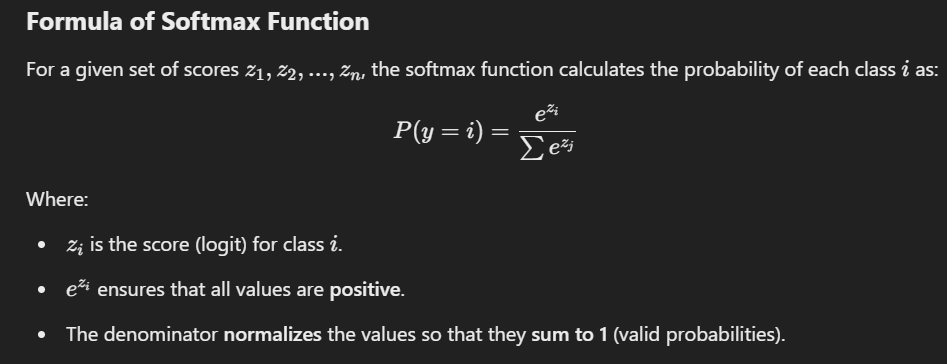

In [ ]:
def softmax(scores):
    exp_scores = np.exp(scores - np.max(scores))  # Subtract max for numerical stability (prevent overflow)
    return exp_scores / np.sum(exp_scores)

# Example scores for 3 classes
scores = np.array([2.0, 1.0, 0.1]) # Class A, B, C (Logits)
probabilities = softmax(scores)

print("Softmax Probabilities:", probabilities)
print("Predicted Class:", np.argmax(probabilities))  # Index of the highest probability


Softmax Probabilities: [0.65900114 0.24243297 0.09856589]
Predicted Class: 0


In [ ]:
scores = np.array([2.0, 1.0, 0.1]) # Class A, B, C (Logits)
exp_scores = np.exp(scores - np.max(scores))  # Subtract max for numerical stability
z = exp_scores / np.sum(exp_scores)
print(np.exp(2 - np.max(scores)))
print(np.exp(1 - np.max(scores)))
print(np.exp(0.1 - np.max(scores)))
z

1.0
0.36787944117144233
0.14956861922263506


array([0.65900114, 0.24243297, 0.09856589])

Softmax applies the exponential function
𝑒^𝑥
  to raw scores (logits). However, exponentials grow very fast, which can lead to:

* **Overflow Errors:** If logits are large (e.g., [1000, 900, 800]), computing e^1000 will be too large for the computer to handle.

* **Numerical Instability:** Large values in the numerator cause floating-point precision issues, making results inaccurate.



This code classifies a new fruit based on its weight and sweetness level. It predicts whether the fruit is an Apple, Banana, or Orange using the Softmax function.

In [ ]:
# Let's Try with some real life example

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Example dataset (Weight in grams, Sweetness level)
fruit_features = np.array([
    [150, 7],  # Apple
    [120, 10], # Banana
    [180, 5]   # Orange
])

**What are weights?**

* Each fruit class (Apple, Banana, Orange) has a weight vector (assigned randomly for now).

* These weights represent the importance of each feature (weight & sweetness) for predicting the fruit.

In [ ]:
# Example model weights (randomly chosen for demo)
weights = np.array([
    [0.02, 0.04],  # Apple weights (0.02 weight for fruit weight nad 0.04 for sweetness)
    [0.03, 0.05],  # Banana weights
    [0.01, 0.02]   # Orange weights
])

In [ ]:
# New fruit to classify (Weight = 130g, Sweetness = 8)
new_fruit = np.array([130, 8])

**Why to do dot product?**

* It multiplies each fruit class’s weights with the new fruit’s features.

* This gives raw scores (logits) before applying Softmax.

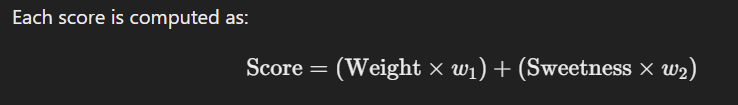

In [ ]:
# Compute scores (logits) for each class
scores = np.dot(weights, new_fruit)  # Matrix multiplication
print(scores)
probabilities = softmax(scores)  # Convert to probabilities
print(probabilities)

[2.92 4.3  1.46]
[0.19204408 0.76335632 0.0445996 ]


In [ ]:
# Get predicted fruit class
fruit_classes = ["Apple", "Banana", "Orange"]
predicted_class = fruit_classes[np.argmax(probabilities)] # as it returns index
print(f'Scores: {scores}')

print(f"Class Probabilities: {probabilities}")
print(f"Predicted Fruit: {predicted_class}")


Scores: [2.92 4.3  1.46]
Class Probabilities: [0.19204408 0.76335632 0.0445996 ]
Predicted Fruit: Banana


#**Ordinal Logistic Regression (Ordered Categories)**
Example: Classifying movie reviews as Bad / Average / Good

How it Works?

* Unlike multinomial, the categories follow an order (e.g., Bad < Average < Good).

* We set multiple thresholds instead of just one.

* Uses a modified sigmoid function to calculate probabilities for each category.

Threshold Selection for Ordinal Logistic Regression
* If sigmoid(x) < 0.3 → "Bad"

* If 0.3 ≤ sigmoid(x) < 0.7 → "Average"

* If sigmoid(x) ≥ 0.7 → "Good"

In [ ]:
# Copy from above just for understanding
def sigmoid(x): # I have created a function of same as we implemented above
    return 1 / (1 + np.exp(-x))

In [ ]:
def classify_ordinal(x):
    prob = sigmoid(x)
    if prob < 0.3:
        return "Bad"
    elif prob < 0.7:
        return "Average"
    else:
        return "Good"

# Example usage
x_values = np.array([-2, 0, 2])
predictions = [classify_ordinal(x) for x in x_values]
print(predictions)  # Output: ['Bad', 'Average', 'Good']


['Bad', 'Average', 'Good']


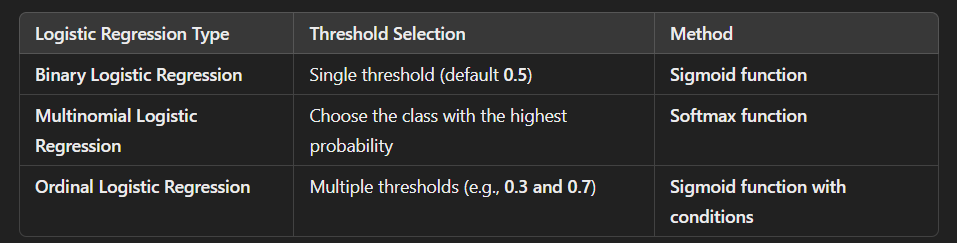

**Graph plotting for Binary Classification(S-Curve)**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate x values for sigmoid
x = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x)
df = pd.DataFrame()
df['x'] = x
df['y_sigmoid'] = y_sigmoid
df

,x,y_sigmoid
0,-10.000000,0.000045
1,-9.797980,0.000056
2,-9.595960,0.000068
3,-9.393939,0.000083
4,-9.191919,0.000102
...,...,...
95,9.191919,0.999898
96,9.393939,0.999917
97,9.595960,0.999932
98,9.797980,0.999944


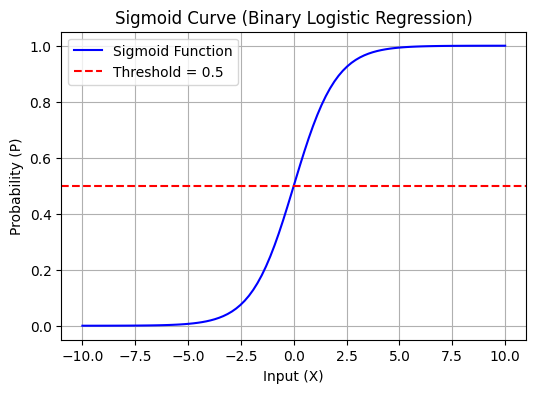

In [ ]:
# Plot Sigmoid Curve (Binary Logistic Regression)
plt.figure(figsize=(6, 4))
plt.plot(df['x'], df['y_sigmoid'], label="Sigmoid Function", color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label="Threshold = 0.5") # add a horizontal line to your Matplotlib plot
plt.xlabel("Input (X)")
plt.ylabel("Probability (P)")
plt.title("Sigmoid Curve (Binary Logistic Regression)")
plt.legend()
plt.grid()
plt.show()


**Graph for multinomial logistic regression**

In [ ]:
probabilities # class A,B,C

array([0.65900114, 0.24243297, 0.09856589])

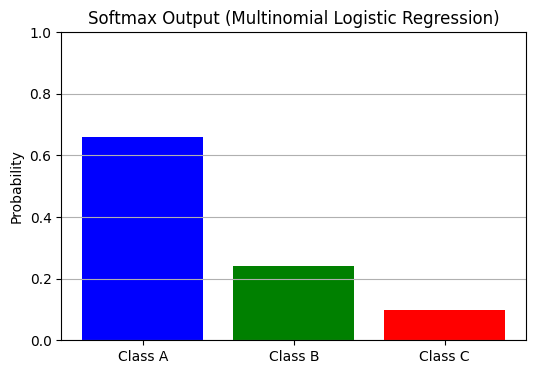

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(["Class A", "Class B", "Class C"], probabilities, color=['blue', 'green', 'red'])
plt.ylabel("Probability")
plt.title("Softmax Output (Multinomial Logistic Regression)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

**For Ordinal Logistic Regression**

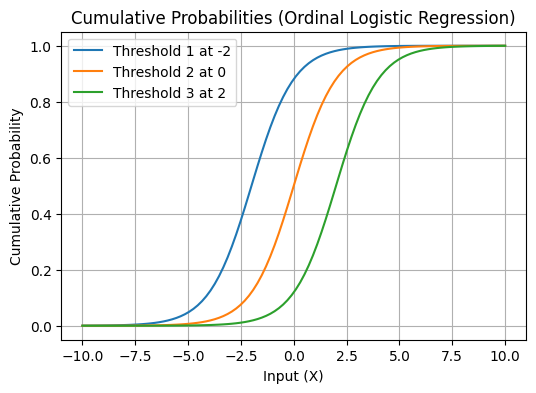

In [ ]:
# Example thresholds for ordinal categories
thresholds = [-2, 0, 2]

# Generate x values
x = np.linspace(-10, 10, 100)

# Compute cumulative probabilities for each threshold
y_cdf = [sigmoid(x - t) for t in thresholds]

# Plot Cumulative Probability (Ordinal Logistic Regression)
plt.figure(figsize=(6, 4))
for i, (t, y) in enumerate(zip(thresholds, y_cdf)):
    plt.plot(x, y, label=f"Threshold {i+1} at {t}")

plt.xlabel("Input (X)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probabilities (Ordinal Logistic Regression)")
plt.legend()
plt.grid()
plt.show()


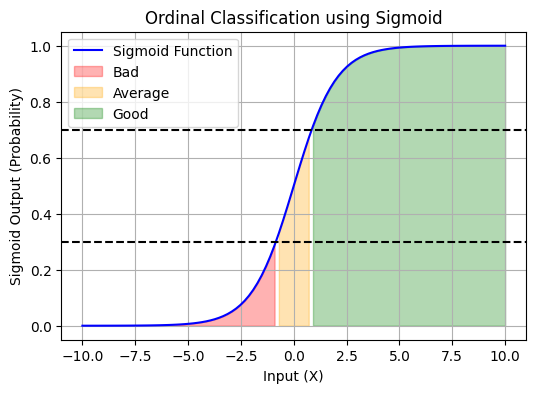

In [ ]:
# Generate x values for visualization
x_vals = np.linspace(-10, 10, 100)
prob_vals = sigmoid(x_vals)

# Define classification boundaries
thresholds = [0.3, 0.7]
categories = ["Bad", "Average", "Good"]
colors = ["red", "orange", "green"]

# Plot Sigmoid Function with Classification Regions
plt.figure(figsize=(6, 4))
plt.plot(x_vals, prob_vals, label="Sigmoid Function", color='blue')

# Shade classification regions
plt.fill_between(x_vals, 0, prob_vals, where=(prob_vals < thresholds[0]), color=colors[0], alpha=0.3, label="Bad")
plt.fill_between(x_vals, 0, prob_vals, where=((prob_vals >= thresholds[0]) & (prob_vals < thresholds[1])), color=colors[1], alpha=0.3, label="Average")
plt.fill_between(x_vals, 0, prob_vals, where=(prob_vals >= thresholds[1]), color=colors[2], alpha=0.3, label="Good")

# Mark classification thresholds
for t in thresholds:
    plt.axhline(y=t, color='black', linestyle='--')

# Labels and title
plt.xlabel("Input (X)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Ordinal Classification using Sigmoid")
plt.legend()
plt.grid()

# Show plot
plt.show()
